# WhatsApp Analyzer
Input all the messages from a chat of yours and see all types of different information! What time of the day do you message the most? What day? What are the most used words in your group chat? All these questions can be answered through the visualization of charts.

## Download data from WhatsApp
First step would be to get the actual data from WhatsApp so you can follow the tutorial for [Android](https://youtu.be/3TQCfQ2NoeY?t=30) and for [iOS](https://www.zapptales.com/en/how-to-export-whatsapp-chat-android-iphone-ios/e-mail-icloud/) and then save it wherever you have saved this Jupyter Notebook.
Do NOT download Media as this is only a text-based analyzer.

In [75]:
"watz poppin"
import datetime
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

In [51]:
# Some functions used later
def dfToOneComment(df):
    oneComment = ""
    #stop = set(STOPWORDS)
    
    for comment in df.Content:
        comment = str(comment)
        tokens = comment.split()
        
        for t in range(len(tokens)):
            tokens[t] = tokens[t].lower()
            
        oneComment += " ".join(tokens) + " "
    return oneComment

def addToComment(main, comment):
    tokens = comment.split()
    for t in range(len(tokens)):
        tokens[t] = tokens[t].lower()
            
    main += " ".join(tokens) + " "
    return main

def commentsToOne(bigComment, name):
    comment = ''
    for i in range(len(bigComment)):

        comment = addToComment(comment, chatDF["Content"][i])
    return comment

def wordCloudPlot(fullComment,stop):
    wordCloud = WordCloud(width = 900, 
                          height = 500,
                          background_color='white',
                          stopwords = stop,
                          min_font_size = 10).generate(fullComment)
    plt.figure(figsize = (8,8) , facecolor = None)
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    return plt
    
def unique(list1): 
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    for x in unique_list: 
        print (x)

## Read in the file into Python so we can separate into different lists
Add the name of the file in the readFile() method as a parameter

In [52]:
def readFile(file):
    text = open(file, 'r', encoding='utf-8') # this merely "opens" the file, and mentions we want to read it
    readText = text.read() # Now it is just one JUGEEE string
    separateText = readText.splitlines() # Now we have an array/list of each newline as a separate element 
    return separateText
myChat = readFile('your-file-here') #INSERT FILE HERE for ex: myChat = readFile('chat.txt')


## Clean up data
Some of the multi line messages are lines of their own. We dont want that and we know that they must be part of the message at i-1 (if they are at index i)

In [53]:


print (len(myChat))

for i in range(len(myChat)):
    # Remember that it is essentially a 2D array since the string can be isolated into its separate elements also 
    try:
        datetime.datetime.strptime(myChat[i].split(',')[0], '%m/%d/%y') 
    except ValueError: # If its not a date, append it to the end of the previous message, and replace it with 'N' to be deleted later
        myChat[i-1] = myChat[i-1] + ' ' + myChat[i]
        #print('yeo')
        myChat[i] = 'toDelete'
    
for i in range(len(myChat)):
    if myChat[i].split(' ')[0] == 'toDelete':
        myChat[i] = 'toDelete'

while(True):
    try:
        myChat.remove('toDelete')
    except ValueError:
        break

print('BLARRRRR')
print (len(myChat)) # OKaty now the chat has been cleaned for all multiline messsages to be appended w the message
# before, we will take out any other extra messages

myChat = [x for x in myChat if (("<Media omitted>" not in x) and (" changed the subject from " not in x) and ( "changed this group's" not in x) and (" This message was deleted" not in x) and (" You deleted this Message" not in x)) ]
print (len(myChat))

18302
BLARRRRR
17555
16840


## Split data into date, time, name, content

In [54]:
name = [myChat[i].split('-')[1].split(':')[0] for i in range(len(myChat))]
name = [space.strip(' ') for space in name]

if('Messages to this chat and calls are now secured with end' in name):
    name.remove('Messages to this chat and calls are now secured with end')


In [55]:
date = [myChat[i].split(',')[0] for i in range(len(myChat))]
if('Messages to this chat and calls are now secured with end' in name):
    del date[0]

In [56]:
# split breaks the string into two elements based on where to break, then we isolate it further and further
time = [myChat[i].split(',')[1].split('-')[0] for i in range(len(myChat))]
time = [i.strip(' ') for i in time] # strip is a function to be used on a string which will take out a specific char
if('Messages to this chat and calls are now secured with end' in name):
    del time[0]

In [57]:
# get the content, remember there are some that have no content bc they are NOT a message
content = []
print ("before for loop: " , len(myChat))

for i in range(len(myChat)):
    if(": " in myChat[i]): # we know FORSURE that it is a message
        content.append(myChat[i].split(': ')[1])
    else:
        myChat[i] = None
        
myChat = [x for x in myChat if x is not None]
print ("after:" , len(myChat))

before for loop:  16840
after: 16839


## Zip all of the different information into one dataframe under their respective columns
We also replace the first Name of the first message with the actual user and not 'messages to this chat... encrypted'

In [58]:
chatDF = pd.DataFrame(list(zip(date, time, name, content)), columns = ['Date','Time','Name','Content'])
chatDF.describe()

,Date,Time,Name,Content
count,16839,16839,16839,16839
unique,324,1369,2,13764
top,3/11/20,9:25 PM,Mohammed Muzaffar,Ya
freq,544,58,8435,91


## Plotting on ALL the messages
### 1) word cloud of ALL of the messages

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

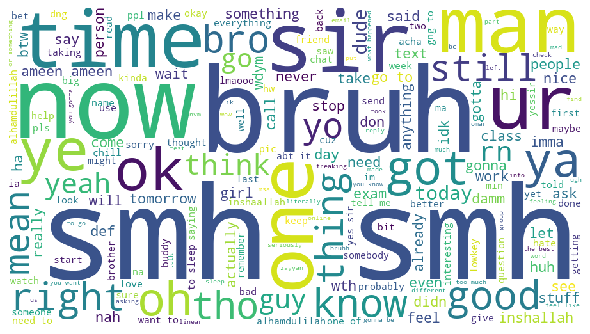

In [60]:
text = dfToOneComment(chatDF)
stop = STOPWORDS # These are the words that will not be included simply because they are super general 
stop.add("lol")
stop.add("wa")
wordCloudPlot(text,stop)

### 2) Various graphs related to periods of time

First we'll need to convert the date column to a datetime object
This will make it easy to interpret the various dates and create different graphs

In [61]:
chatDF["Date"] = pd.to_datetime(chatDF['Date'], format = '%m/%d/%y')
chatDF["Time"] = pd.to_datetime(chatDF['Time'], format = '%I:%M %p')

chatDF["Year"] = chatDF["Date"].dt.year
chatDF["Month"] = chatDF["Date"].dt.month
chatDF["Weekday"] = chatDF["Date"].dt.weekday
chatDF["Day"] = chatDF["Date"].dt.day
chatDF["Hour"] = chatDF["Time"].dt.hour


chatDf = chatDF.set_index(pd.DatetimeIndex(chatDF["Date"]))

In [62]:
chatDF.head(20)

,Date,Time,Name,Content,Year,Month,Weekday,Day,Hour
0,2018-06-22,1900-01-01 01:20:00,Mohammed Muzaffar,Muzaffar,2018,6,4,22,1
1,2018-06-22,1900-01-01 01:20:00,Shahrukh Raza,Yo you coming to the student gathering at masj...,2018,6,4,22,1
2,2018-06-22,1900-01-01 20:05:00,Mohammed Muzaffar,Yes inshallah,2018,6,4,22,20
3,2018-06-22,1900-01-01 20:31:00,Shahrukh Raza,Yo do you know what time Isha is at jamia,2018,6,4,22,20
4,2018-06-22,1900-01-01 22:24:00,Mohammed Muzaffar,10:45,2018,6,4,22,22
5,2018-06-22,1900-01-01 22:38:00,Shahrukh Raza,Jazakallahu khair,2018,6,4,22,22
6,2018-06-22,1900-01-01 22:43:00,Mohammed Muzaffar,Waiyyakum,2018,6,4,22,22
7,2018-06-22,1900-01-01 23:03:00,Mohammed Muzaffar,Asalamuwalaikum,2018,6,4,22,23
8,2018-07-04,1900-01-01 17:53:00,Mohammed Muzaffar,A couple of brother who r in the effort of dee...,2018,7,2,4,17
9,2018-07-04,1900-01-01 17:54:00,Shahrukh Raza,Wassalaam. Yeah sure I don't mind,2018,7,2,4,17


#### a) Heatmap (By each month)

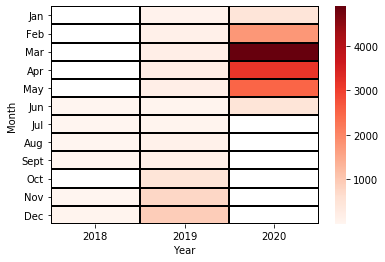

In [63]:
heatDF = chatDF.groupby(["Month", "Year"]).count().reset_index()
#print(heatDF)
hm = heatDF.pivot( "Month","Year", "Content") # make the rows by month, the years are the columns and the number of messages are the values
#print("AFter pivot")
ax = sb.heatmap(hm, cmap = "Reds", linewidths= 1,linecolor = 'black',yticklabels = ['Jan','Feb','Mar',
                                                                                    'Apr','May','Jun',
                                                                                    'Jul','Aug','Sept',
                                                                                    'Oct','Nov','Dec'])

In [65]:
#heatDF
dAndM = heatDF.pivot("Month","Year","Content")
print(dAndM)
px.bar(dAndM,barmode='group',title = 'Number of Messages per Month for every year',labels = {1:'Jan',2:'Feb'})

Year   2018   2019    2020
Month                     
1       NaN   86.0   477.0
2       NaN  148.0  1770.0
3       NaN  197.0  4892.0
4       NaN  245.0  3159.0
5       NaN  206.0  2519.0
6       8.0   55.0   497.0
7       5.0   42.0     NaN
8       2.0  129.0     NaN
9       5.0  155.0     NaN
10      NaN  483.0     NaN
11     13.0  774.0     NaN
12     52.0  920.0     NaN


#### b) Based on Day of Week - Line Polar Graph and Bar Graph
This will show the number of messages in relation to the the specific day of the week (Bar graph is commented out)

chatDF["Name"].unique()

In [66]:
pd.options.plotting.backend = 'plotly'
y1 = np.arange(1, 11)
weekdayDF = chatDF.groupby("Weekday").count().reset_index()
weekdayDF = weekdayDF[["Weekday","Content"]]
weekdayDF = weekdayDF.replace({0:"Monday",1:"Tuesday",2:"Wednesday",3: "Thursday", 4:"Friday",5: "Saturday", 6:"Sunday"})
simp_bar_plot = weekdayDF.plot.bar(x = 'Weekday', y = 'Content', color = 'Content')
#simp_bar_plot.show()
#weekdayDF

In [67]:
f = px.line_polar(weekdayDF, 
                  r = 'Content', 
                  theta = 'Weekday', 
                  line_close = 'True',#color_discrete_sequence=px.colors.sequential.Bluered
                  color_discrete_sequence=px.colors.diverging.PiYG)
f.update_traces(fill = 'toself')
f.show()

## An hourly analysis
How many message sent every single hour? 

In [68]:
hourlyDF = chatDF.groupby("Hour").count().reset_index()
hourlyDF.head(20)

,Hour,Date,Time,Name,Content,Year,Month,Weekday,Day
0,0,428,428,428,428,428,428,428,428
1,1,253,253,253,253,253,253,253,253
2,2,208,208,208,208,208,208,208,208
3,3,115,115,115,115,115,115,115,115
4,4,553,553,553,553,553,553,553,553
5,5,191,191,191,191,191,191,191,191
6,6,430,430,430,430,430,430,430,430
7,7,620,620,620,620,620,620,620,620
8,8,385,385,385,385,385,385,385,385
9,9,671,671,671,671,671,671,671,671


In [69]:
hourlyDF = chatDF.groupby("Hour").count().reset_index()

hour_bar = hourlyDF[["Hour", "Content"]].plot.bar(x = ["12am", "1am", "2am", "3am", "4am", 
                                                       "5am", "6am", "7am", "8am",
                                                       "9am", "10am", "11am", "12pm", "1pm", 
                                                       "2pm", "3pm", "4pm", "5pm",
                                                       "6pm", "7pm", "8pm", "9pm", "10pm", "11pm"], y = 'Content')

hour_bar.show()

## Explore Most used messages

In [70]:

allMFreq = chatDF.Content.value_counts().head(20)
allMessagesBar = px.bar(allMFreq, title = 'Most Used messages in group')
allMessagesBar

## Now Data on a User to User basis
We will iterate through all the users and create respective Dataframes that will subsequently contain only that users messages

In [71]:
# This is pretty important, over here we create separate separate data frames based on the user
dictDT = {}
for name in chatDF["Name"].unique():
    userDF = chatDF.loc[(chatDF["Name"] == name), ['Date','Time','Name','Content']]
    dictDT[name] = userDF

# ***NOW we have a dictionary with the key being the specific user's name and the value being a data frame with ONLY their messages***
    

## Create bar plots from most used messages

In [73]:
specFreq = []
for i in range(len(chatDF["Name"].unique())):
    userDF = dictDT[chatDF["Name"].unique()[i]]
    print("Username: ",chatDF["Name"].unique()[i])
    specFreq.append([chatDF["Name"].unique()[i], userDF.Content.value_counts().head(20)]) # Save the name and data frame

for i in range(len(chatDF["Name"].unique())):
    x = chatDF["Name"].unique()[i] + "'s Most Used Messages"
    bar = px.bar(specFreq[i][1], title = x )
    bar.show()


Username:  Mohammed Muzaffar
Username:  Shahrukh Raza


## Create Word Cloud

Username:  Mohammed Muzaffar

Username:  Shahrukh Raza

Huee durr


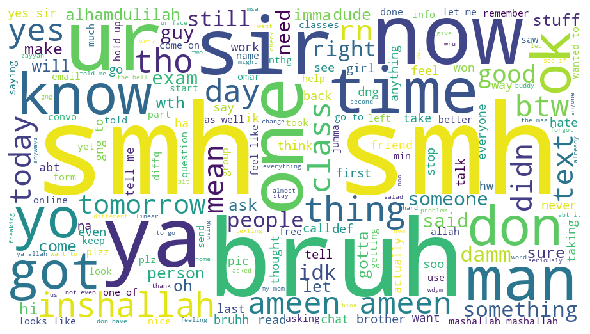

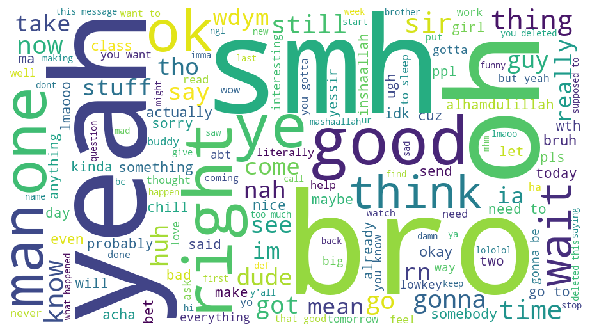

In [28]:
stop = STOPWORDS
stop.add("lol")
stop.add("lmao")
stop.add("media omitted")
allText = []
#stop.remove("them")
wordclouds = {}
for i in range(len(chatDF["Name"].unique())):
    print("Username: ",chatDF["Name"].unique()[i])
    allText.append(dfToOneComment(dictDT[chatDF["Name"].unique()[i]]))
    #print(text)
    wordclouds[chatDF["Name"].unique()[i]] = wordCloudPlot(allText[i],stop)
    print()